<a href="https://colab.research.google.com/github/Sarthik-mehta/Digital-Electric-Meter-Reading-Model-Based-on-Image-Processing/blob/main/MeterReadingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#installing necessary libraries
!pip install easyocr
!pip install imutils
!pip install opencv-python

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Importing the required libraries
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imutils
import easyocr

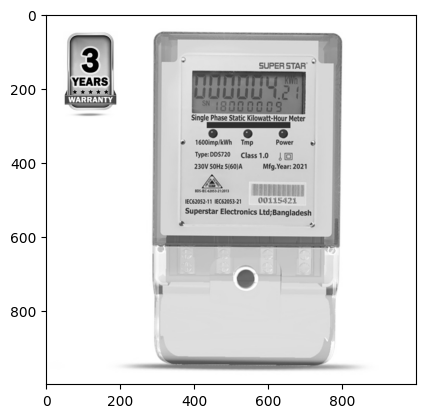

In [8]:
#img = cv2.imread('/content/Tata-Power-DDL.jpg')
#img = cv2.imread('Tata-Power-DDL.jpg')
img = cv2.imread('meter1.jpeg')
#img = cv2.imread('Tata-Power-DDL.jpg')

if img is not None:
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


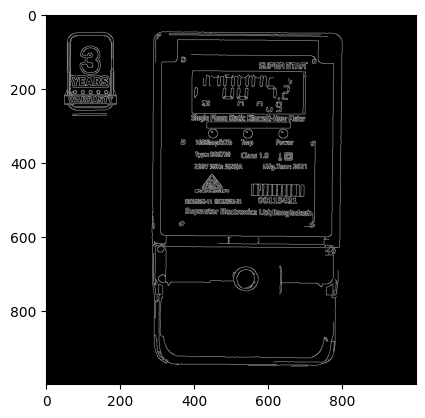

In [9]:
#Noise reduction 1 17 17
bfilter = cv2.bilateralFilter(gray, 1, 17, 17)
#Edge detection 30 200
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [10]:
#finding contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [11]:
#find exact location of screen
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[395, 155]],

       [[397, 268]],

       [[700, 269]],

       [[701, 156]]], dtype=int32)

In [12]:
#Masking the original image
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

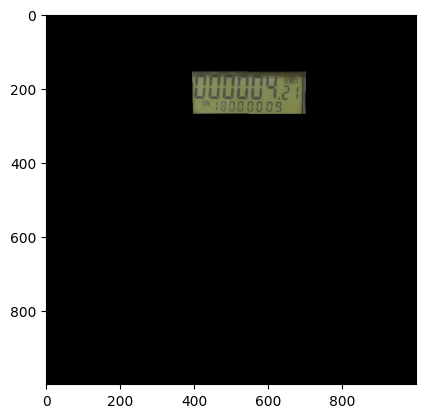

In [13]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [14]:
#Cropping the display region
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

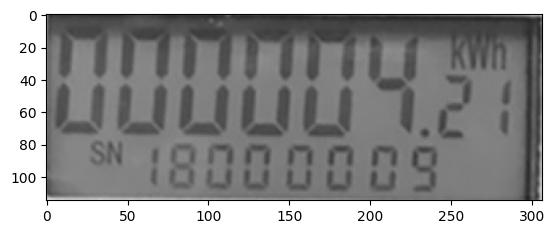

In [15]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

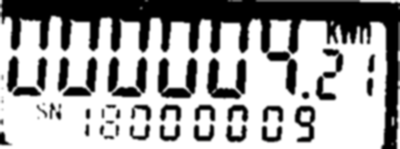

1


In [18]:
from google.colab.patches import cv2_imshow
#series of morphological operations to cleanup the thresholded image
image1=cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
image2 = imutils.resize(image1, width=400)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
thresh = 255 - cv2.GaussianBlur(thresh, (5,5), 0)
cv2_imshow(thresh)
#cv2.imshow('Thresholded Image', thresh)
print(1)

In [19]:
# # Convert to RGB
# image1 = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# # Resize
# image2 = imutils.resize(image1, width=400)

# # Convert to grayscale
# gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# # Thresholding
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Invert and apply Gaussian Blur
# thresh = 255 - cv2.GaussianBlur(thresh, (5,5), 0)

# # Display the thresholded image using matplotlib
# plt.imshow(thresh, cmap='gray')
# plt.axis('off')  # Turn off axis labels
# plt.show()

In [20]:
reader = easyocr.Reader(['en'])
result = reader.readtext(thresh,allowlist = '.0123456789')
val=0
reading=0
#filtering out the main reading
for i,j,k in result:
  if len(j)>val:
    reading=j
    val=len(j)

print("The predicted reading is: ",reading)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteThe predicted reading is:  88888889
